# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import show
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Import Dataset

In [2]:
df_catalysis_dataset = pd.read_csv("../data/OCM-data.csv", index_col=0, header=0)
df_catalysis_dataset.dtypes

M1                    object
M1_atom_number         int64
M2                    object
M2_atom_number         int64
M3                    object
M3_atom_number         int64
Support               object
Support_ID             int64
M2_mol               float64
M3_mol               float64
M1_mol_percentage      int64
M2_mol_percentage      int64
M3_mol_percentage      int64
Temp                   int64
Total_flow             int64
Ar_flow              float64
CH4_flow             float64
O2_flow              float64
CT                   float64
CH4/O2                 int64
CH4_conv             float64
C2y                  float64
C2H6y                float64
C2H4y                float64
COy                  float64
CO2y                 float64
C2s                  float64
C2H6s                float64
C2H4s                float64
COs                  float64
CO2s                 float64
dtype: object

# Define Variables

In [16]:
x = df_catalysis_dataset[["Ar_flow", "CH4_flow", "O2_flow", "CT", "M2_mol", "M3_mol"]]
print(x)

              Ar_flow  CH4_flow  O2_flow    CT  M2_mol  M3_mol
Name                                                          
Mn-Na2WO4/BN      1.5       5.7      2.8  0.75    0.37   0.185
Mn-Na2WO4/BN      2.3       8.5      4.3  0.50    0.37   0.185
Mn-Na2WO4/BN      3.0      11.3      5.7  0.38    0.37   0.185
Mn-Na2WO4/BN      1.5       6.4      2.1  0.75    0.37   0.185
Mn-Na2WO4/BN      2.3       9.6      3.2  0.50    0.37   0.185
...               ...       ...      ...   ...     ...     ...
Na/SiO2          10.5       3.6      0.9  0.50    0.37   0.000
Na/SiO2          14.0       4.8      1.2  0.38    0.37   0.000
Na/SiO2           7.0       2.6      0.4  0.75    0.37   0.000
Na/SiO2          10.5       3.9      0.6  0.50    0.37   0.000
Na/SiO2          14.0       5.1      0.9  0.38    0.37   0.000

[12708 rows x 6 columns]


In [4]:
# CH4_conv, C2y, COy
y = df_catalysis_dataset["COy"].values
print(y)

[30.82 31.29 21.62 ...  1.5   1.61  2.15]


# Split the dataset into training and test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train the model on training set

In [6]:
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

# Predict

In [7]:
y_pred = ml.predict(x_test)
print(y_pred)

[10.19990014 18.49770267  3.8583983  ... 21.21607837  6.21247162
 19.46004497]


# Evaluate

In [8]:
r2Score = r2_score(y_test, y_pred)

Text(0.5, 1.0, 'Actual vs. Predicted')

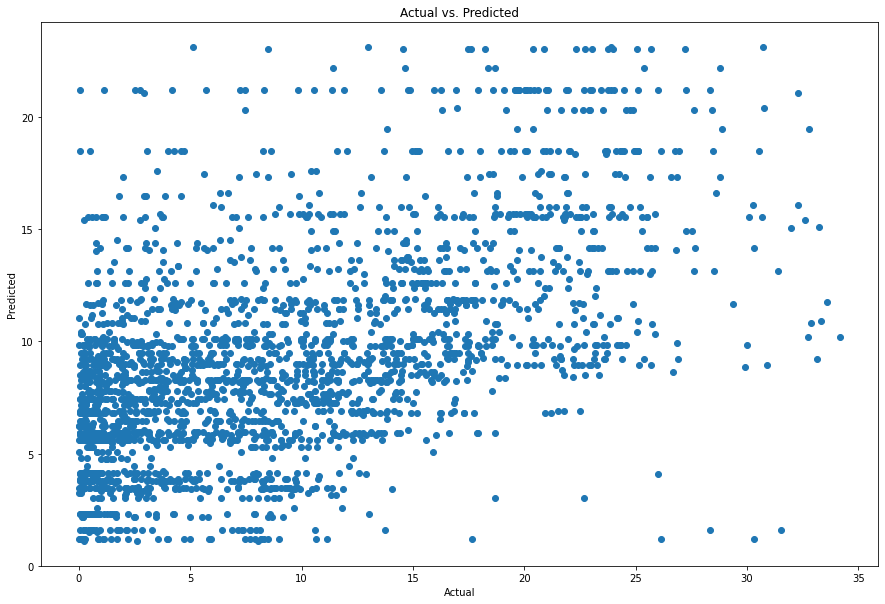

In [9]:
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

# Predicted Values

In [10]:
pred_y_df = pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_pred, "Difference":y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,32.72,10.199900,22.520100
1,0.06,18.497703,-18.437703
2,6.38,3.858398,2.521602
3,13.06,8.137156,4.922844
4,0.22,15.425281,-15.205281
5,30.67,15.558982,15.111018
6,2.77,3.858398,-1.088398
7,19.17,12.603042,6.566958
8,25.63,17.349966,8.280034
9,2.79,9.850400,-7.060400


In [11]:
source = ColumnDataSource(dict(tabs=["R2"], data=[r2Score]))
columns = [TableColumn(field="tabs"), TableColumn(field="data")]

In [12]:
data_table = DataTable(source=source, columns=columns, width=400, height=200)
show(data_table)

In [13]:
print(ml.coef_)

[-0.31947301 -1.24536559  4.8178489   2.63298325 -5.20185031  0.60970461]
